# Trabajo Práctico 2

1. Implemente un perceptrón simple que aprenda la función lógica AND y la función
lógica OR, de 2 y de 4 entradas. Muestre la evolución del error durante el
entrenamiento. Para el caso de 2 dimensiones, grafique la recta discriminadora y todos
los vectores de entrada de la red

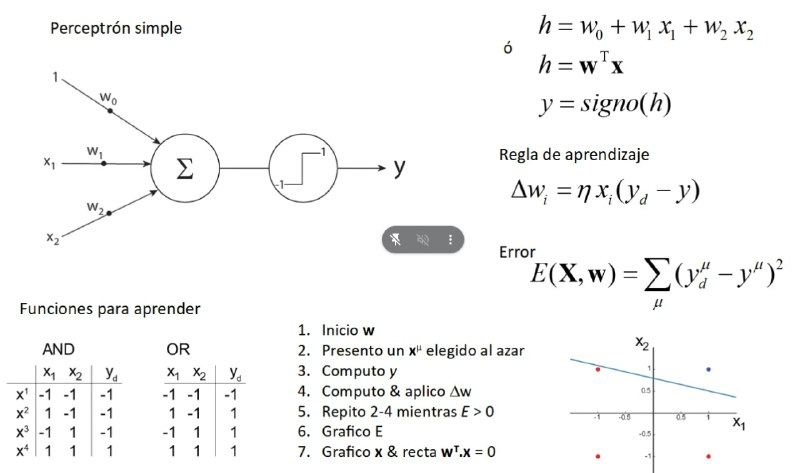

In [18]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=100, error = 100):
        self.weights = np.zeros(input_size +1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.error = error


    def activation_function(self, x):
        return 1 if x > 0 else -1

    def predict(self, x):
        z = self.weights.T.dot(np.insert(x, 0, 1))  # Insert 1 for the bias term
        return self.activation_function(z)

    def ECM(self, yd, y):
        self.error = sum((yd - y) **2 for yd, y in zip(yd, y))
        return self.error
    def fit(self, X, y):
        for epoch in range(self.epochs):
            if self.error == 0:
                break
            indexes = np.random.permutation(len(y))
            for index in indexes:
                prediction = self.predict(X[index])
                self.weights[1:] += self.learning_rate * (y[index] - prediction) * X[index]
                self.weights[0] += self.learning_rate * (y[index] - prediction)
                y_pred = [self.predict(xi) for xi in X]
                self.ECM(y, y_pred)
            plt.plot(epoch +1, self.error, 'ro')
            plt.xlabel('Epoch')
            plt.ylabel('Error')
            plt.title('Error vs Epoch')


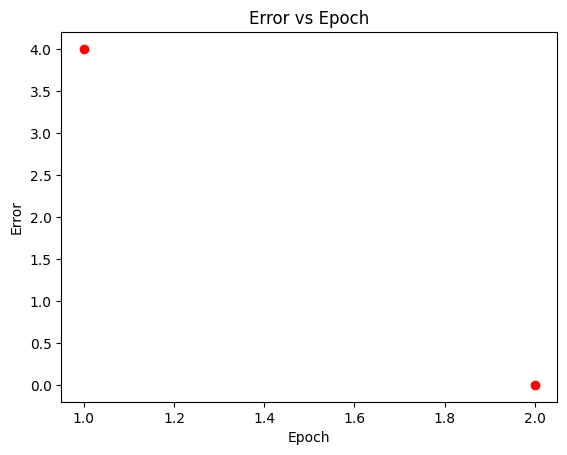

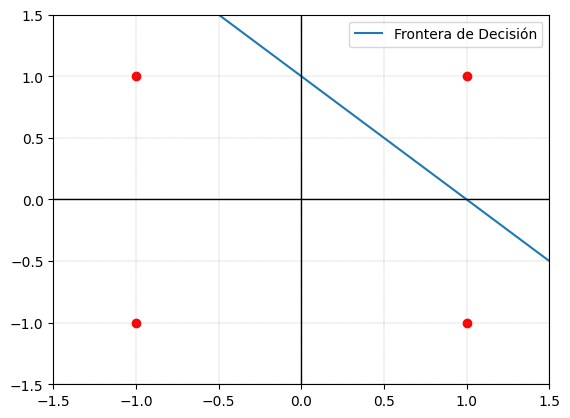

In [17]:
x_and = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_and = np.array([-1, -1, -1, 1])
perceptron_and = Perceptron(2)
perceptron_and.fit(x_and, y_and)
plt.figure()
plt.scatter(x_and[:, 0], x_and[:, 1], c="red")
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron_and.weights[1] * x_values + perceptron_and.weights[0]) / perceptron_and.weights[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()


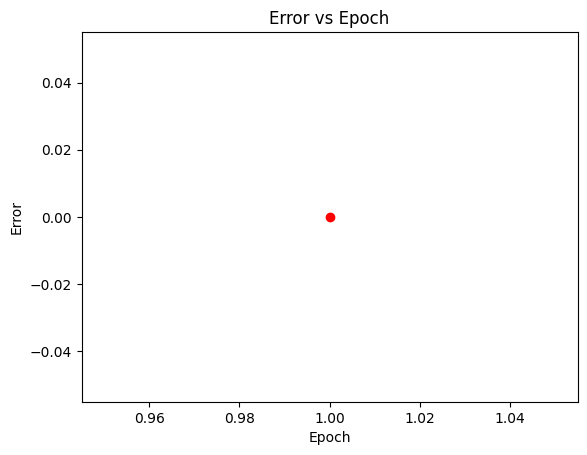

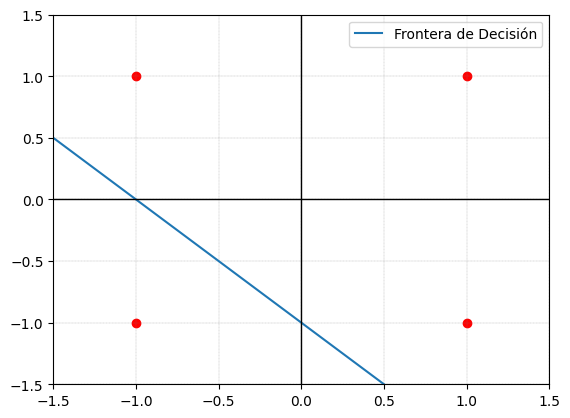

In [22]:
x_or = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
y_or = np.array([-1, 1, 1, 1])
perceptron_or = Perceptron(2)
perceptron_or.fit(x_or, y_or)
plt.figure()
plt.scatter(x_or[:, 0], x_or[:, 1], c="red")
x_values = np.linspace(-3, 3, 100)
y_values = -(perceptron_or.weights[1] * x_values + perceptron_or.weights[0]) / perceptron_or.weights[2]
plt.plot(x_values, y_values, label='Frontera de Decisión')
plt.axhline(0, color='black',linewidth=1)
plt.axvline(0, color='black',linewidth=1)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.2)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend()




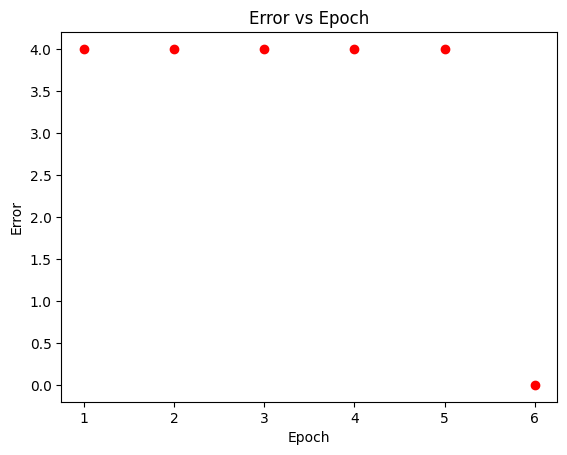

In [27]:
import itertools

permutations = list(itertools.product([True, False], repeat=4))
y4_and = []
for p in permutations:
    if p[0] and p[1] and p[2] and p[3]:
        y4_and.append(1)
    else:
        y4_and.append(-1)

x4_and = np.array(permutations)
x4_and = np.where(x4_and, 1, -1)

perceptron_4_and = Perceptron(4)
perceptron_4_and.fit(x4_and, y4_and)


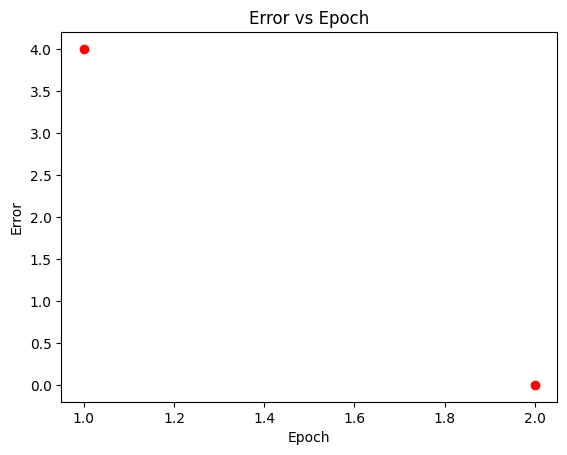

In [30]:
x4_or = x4_and.copy()
y4_or = []
for p in permutations:
    if p[0] or p[1] or p[2] or p[3]:
        y4_or.append(1)
    else:
        y4_or.append(-1)

perceptron_4_or = Perceptron(4)
perceptron_4_or.fit(x4_or, y4_or)

